## Tutorial: Modeling Faces using PCA 

### In this tutorial, and associated homework, we will model faces using PCA, and learn how to detect a smile.  


In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

#### In the attached file, I have 72 faces, each one 50 pixels x 50 pixels.
#### 36 faces are labeled "neutral" while 36 faces are labeled "smiling"  

In [2]:
f = loadmat('data/faces.mat')
faces = f['faces'] #This are the faces.  There are 72 faces closely cropped to the boundary of the face.
smiling = f['smiling'][0] #Flag to indicate if the face was a smile. 0 means neutral expression and 1 means smiling.

#### Visualize some of the faces

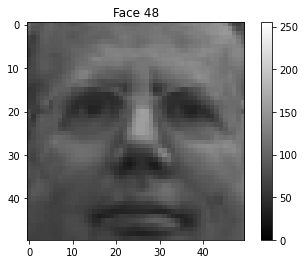

In [3]:
sample = 48
plt.figure()
plt.imshow(faces[sample,:,:],cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images) 8 bit images. grayscale range: white = 255, black = 0
plt.title('Face ' + str(sample))
#plt.axis('off')
plt.colorbar()

#### Here's a little code box I used to get some empirical information on the the faces 

In [4]:
np.max(faces)

222.22671761601015

#### Range goes from 3.6 --> 222. no pixel is every completely lack or white.

#### Lets get the mean face 

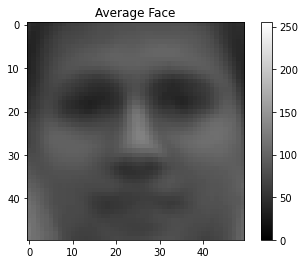

In [5]:
meanface = np.mean(faces,axis = 0)
plt.figure()
plt.imshow(meanface,cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Average Face')
#plt.axis('off')
plt.colorbar()

#### Problem #1 Visualize the mean face for smiling and neutral faces.  
####            Also make an image of the difference between the two mean faces. 

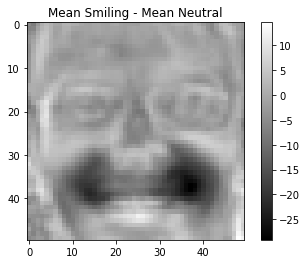

In [6]:
#Problem 1
meansmiling = np.mean(faces[smiling == 1,:,:],axis = 0)
meanneutral = np.mean(faces[smiling == 0,:,:],axis = 0)

meanfacediff = meansmiling - meanneutral
plt.figure()
plt.imshow(meanfacediff,cmap='gray')
plt.title('Mean Smiling - Mean Neutral')
plt.colorbar()

#### If we were to do a statistical test of the difference between smiling and neutral faces, the simplest thing to do is to use an independent samples **t-test**
#### The first 36 images are neutral and the next 36 images are smiling faces.  
#### What we will do is at each image pixel we will do a t-test comparing the 36 values for a neutral face to the 36 values for smiling face 


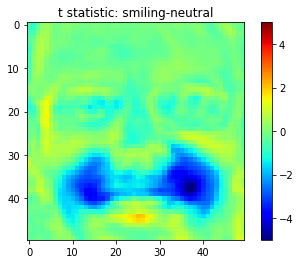

In [7]:
from scipy.stats import ttest_ind
#
t,p = ttest_ind(faces[smiling == 1,:,:],faces[smiling == 0,:,:],axis = 0) #axis 0 = perform t-test across every subject
plt.figure()
plt.imshow(t,cmap='jet',vmin=-5, vmax=5)
plt.title('t statistic: smiling-neutral')
#plt.axis('off')
plt.colorbar()

#### At every pixel, there are 36 values for neutral and 36 values for smiling face. Running a t-test on every pixel gives you a t-statistic for every pixel. 
#### There's two places on the image that tell you where the person is smiling or not (seen in the blue patches). The colors give the difference of whether the person was smiling or not. 

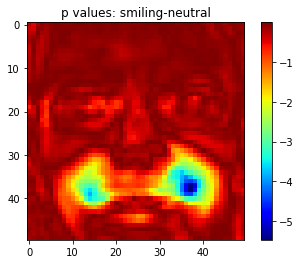

In [8]:
plt.figure()
plt.imshow(np.log10(p),cmap='jet') #plot on a logarithmic scale
plt.title('p values: smiling-neutral')
#plt.axis('off')
plt.colorbar()
plt.show()

#### Lets examine what this means.  

#### I want to remind you of what **Significance** means in a statistical test. 

#### Significance level means the probability that you find a difference between groups/conditions even though there is none. So a .05 value means a 5% chance that you falsely detected a difference even though there is no difference.

In [9]:
alpha = 0.05 #significance level 
nsig = len(p  < alpha)
print('nigs: ', nsig)
ntests = 50*50
print('ntests :', ntests)
false_rate = ntests*alpha 
print('false_rate:', false_rate)

nigs:  50
ntests : 2500
false_rate: 125.0


#### PCA analysis of faces 

In [10]:
faces2 = faces.reshape(72,50*50) # the data matrix is 72 by 2500 and there are 2500 variables and 72 observations. Reshaped it so that instead of faces being faces(72,50,50), its faces(72,50x50)
meanfaces2 = meanface.reshape(50*50)
ncomp = 70  # I am going to choose to look at 72 components. Computing 72 eigenvecotrs for 72 subjects
pca = PCA(n_components = ncomp) #decide of number of components. ALWAYS less than or equal to smaller dimension of data matrix
pca.fit(faces2) #fit the model
face_loading = pca.components_ #get the eigenvectors
face_latent = pca.explained_variance_ #get the explained variance
face_percentage_explained  = 100*face_latent/sum(face_latent)
face_components = pca.transform(faces2)

#### Examine the explained variance. 

Text(0, 0.5, 'Percentage Variance')

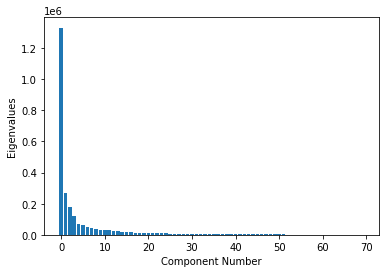

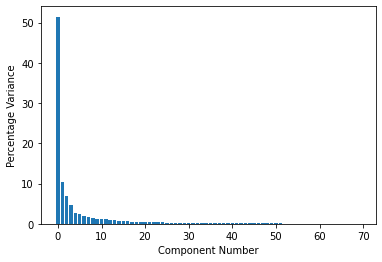

In [11]:
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_latent)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_percentage_explained)
plt.xlabel('Component Number')
plt.ylabel('Percentage Variance')

#### There's a single component that explains the variance across faces.
#### Using 70 eigenvectors gives back a latent variable face_latent = 70 which is all the eigenvalues, face_loading = (70x2500) which is actually (70,50x50) since the eigenvectors are weignts on the images themselves and face_component = (72 = each original image,70 = number of eigenvectors). Looks at: for each image, how much of each eigenvector do you mix to get the original image back?

#### Im going to use reshape to reshape the loading vectors into images

### Problem #2  Visualize using imshow the first 5 loading vectors.  

#### To help you do this problem, I am going to reshape the loading vector (the eigenvectors) back into the shape of the original image

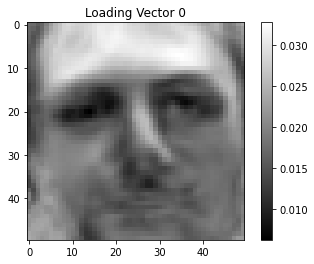

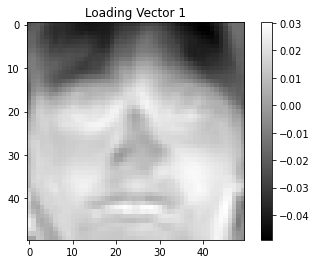

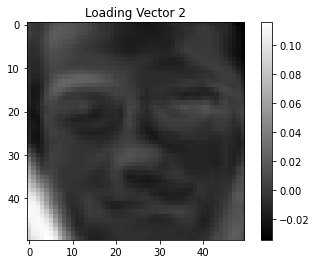

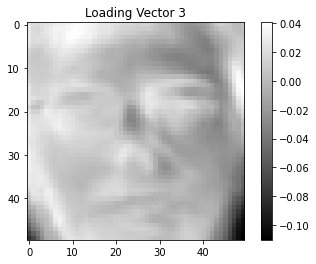

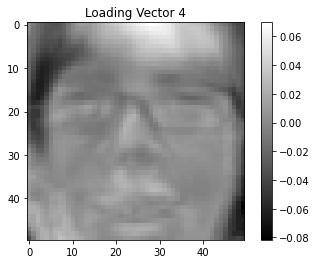

In [21]:
#Problem 2
face_loading_image = face_loading.reshape(ncomp,50,50)
### write your code here to look at the first 5 loading vectors as images 

for j in range(5):
    plt.figure()
    plt.imshow(face_loading_image[j,:,:],cmap='gray') 
    plt.title('Loading Vector ' + str(j))
    plt.colorbar()
    plt.show()


#### This is the first eigenvector that it came up with. note that mouth is not captured but eyes and nose are, showing that eyes nose junction are the strongest feature a person has. These are just patterns of variations across faces. 

#### you don't need 72 dimensions to capture the variance of 72 faces

#### What do the components look like?

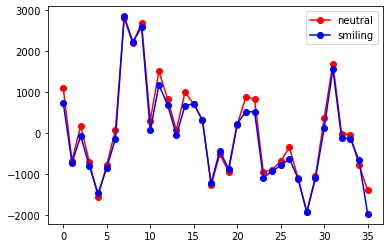

In [22]:
c = 0
plt.plot(face_components[smiling == 0,c],'ro-')
plt.plot(face_components[smiling == 1,c],'bo-')
plt.legend(('neutral','smiling'))
plt.show()


#### This shows how much weight each participant places on the first component

### Problem #3 Use the independent samples t test on the face_components variables
### Find which components capture the difference between neutral and smiling and visualize them

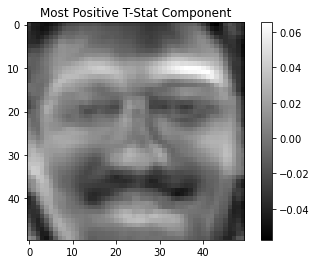

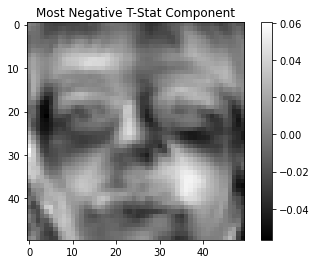

In [29]:
#Problem 3
t_components,p_components = ttest_ind(face_components[smiling == 1,:],face_components[smiling == 0,:],axis = 0) #axis 0 = perform t-test across every subject

nmax = np.argmax(t_components) #highest t component
nmin = np.argmin(t_components) #lowest t component
plt.figure()
plt.imshow(face_loading_image[nmax,:,:],cmap='gray') 
plt.title('Most Positive T-Stat Component')
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(face_loading_image[nmin,:,:],cmap='gray') 
plt.title('Most Negative T-Stat Component')
plt.colorbar()
plt.show()

#### Finally, out of completeness, I demonstrate that I can reconstruct the images from the eigenfaces 

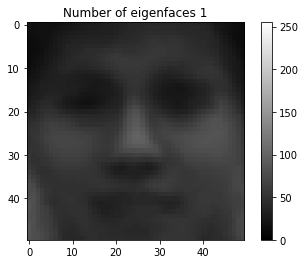

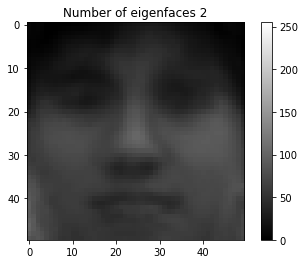

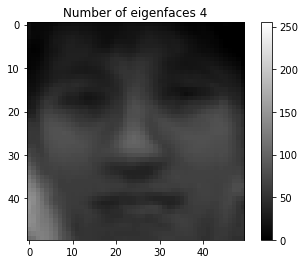

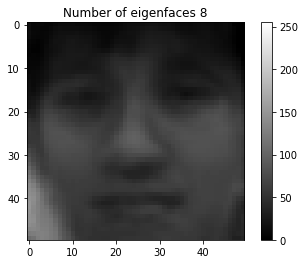

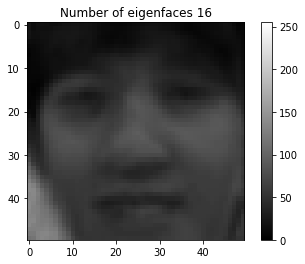

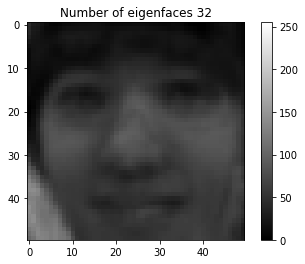

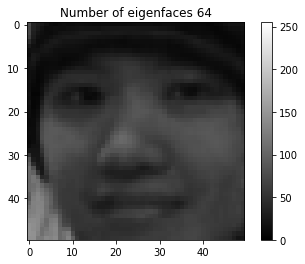

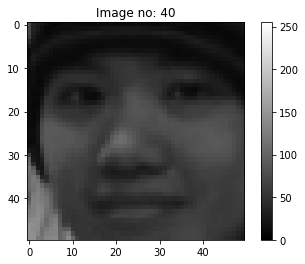

In [27]:
imageno = 40
ncomp = [1,2,4,8,16,32,64]
for j in range(len(ncomp)):
    compface = face_components[imageno,np.arange(ncomp[j])]@face_loading[np.arange(ncomp[j]),:] #@ is item by item multiplication
    makeface = compface.reshape(50,50) +meanface #be sure to add back the mean
    plt.figure()
    plt.imshow(makeface,cmap='gray',vmin = 0,vmax = 255)
    plt.title('Number of eigenfaces ' + str(ncomp[j]))
    plt.colorbar()

f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 255)
plt.title('Image no: ' + str(imageno))
plt.colorbar() 

#### loading vector tells the raltionship between the variables (2500) and the eigenvectors (70). Component is the observation (72) by the eigenvectors (70). 

Original covariance matrix would be 2500x2500 since you have a 50x50 pixel image